In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [7]:
#configure
path = "RBS_length_aln.csv"
out_name = "".join(path.split(".")[0])

In [8]:
df = pd.read_csv(path, index_col=0)
df

,1RVZ,4FQR,H3_RBS2,H2_RBS2,H1_RBS2,H3_RBS3,H2_RBS3,H1_RBS3,H1_RBS1,H2_RBS1,H3_RBS1
,,,,,,,,,,,
1RVZ,0.000,1.950,1.034,0.830,0.576,1.384,0.719,0.623,0.865,1.059,1.007
4FQR,1.950,0.000,0.543,0.986,0.789,0.815,1.058,1.009,1.072,1.179,1.089
H3_RBS2,1.034,0.543,0.000,1.045,0.842,0.299,0.946,0.922,0.912,1.039,0.797
H2_RBS2,0.830,0.986,1.045,0.000,0.833,1.153,0.465,0.837,0.945,0.818,1.003
H1_RBS2,0.576,0.789,0.842,0.833,0.000,0.933,0.603,0.184,0.716,1.201,0.916
H3_RBS3,1.384,0.815,0.299,1.153,0.933,0.000,1.159,1.060,0.851,1.245,1.194
H2_RBS3,0.719,1.058,0.946,0.465,0.603,1.159,0.000,0.609,0.813,0.713,1.059
H1_RBS3,0.623,1.009,0.922,0.837,0.184,1.060,0.609,0.000,0.726,1.123,0.987
H1_RBS1,0.865,1.072,0.912,0.945,0.716,0.851,0.813,0.726,0.000,1.303,1.138


In [9]:
df.describe()

,1RVZ,4FQR,H3_RBS2,H2_RBS2,H1_RBS2,H3_RBS3,H2_RBS3,H1_RBS3,H1_RBS1,H2_RBS1,H3_RBS1
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.913364,0.953636,0.761727,0.810455,0.690273,0.917545,0.740364,0.734545,0.849182,0.988364,0.943818
std,0.491942,0.470663,0.341080,0.321896,0.343217,0.421300,0.329626,0.362277,0.332825,0.373534,0.334472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.671000,0.802000,0.670000,0.824000,0.589500,0.833000,0.606000,0.616000,0.769500,0.928500,0.951500
50%,0.865000,1.009000,0.912000,0.837000,0.789000,1.060000,0.719000,0.837000,0.865000,1.123000,1.007000
75%,1.046500,1.080500,0.990000,0.994500,0.879000,1.176500,1.002000,0.998000,1.008500,1.196500,1.113500
max,1.950000,1.950000,1.045000,1.153000,1.201000,1.384000,1.159000,1.123000,1.303000,1.303000,1.194000


In [40]:
for name_c, name_r in zip(df.columns, df.index):
    if "H" in name_c:
        print(name_c, name_r)
        df = df.rename(columns={name_c: name_c+"_RBS" }, index={name_r: name_r+"_RBS"})
    else:
        df = df.rename(columns={name_c: name_c+"_monomer"}, index={name_c: name_c+"_monomer"})
        

H1_H3_H5_af H1_H3_H5_af
H1_H3__af H1_H3__af
H7_af H7_af
H5_af H5_af
H3_af H3_af
H2_af H2_af
H1_af H1_af
human_af human_af


In [5]:
df

,1RVZ_RBS,4FQR_RBS,human,H7,H5,H3,H2,H1
1RVZ_RBS,0.000,1.143,1.313,0.792,0.806,1.384,0.719,0.623
4FQR_RBS,1.143,0.000,0.965,1.157,1.163,0.843,1.073,1.019
human,1.313,0.965,0.000,1.218,1.106,0.636,1.163,1.273
H7,0.792,1.157,1.218,0.000,0.954,1.327,0.675,0.795
H5,0.806,1.163,1.106,0.954,0.000,0.951,0.795,0.640
H3,1.384,0.843,0.636,1.327,0.951,0.000,1.159,1.060
H2,0.719,1.073,1.163,0.675,0.795,1.159,0.000,0.609
H1,0.623,1.019,1.273,0.795,0.640,1.060,0.609,0.000


In [50]:
#df.describe().loc["mean"].to_csv("RMSD_means.csv")

In [10]:
df.loc['MEAN'] = df.mean()
df

,1RVZ,4FQR,H3_RBS2,H2_RBS2,H1_RBS2,H3_RBS3,H2_RBS3,H1_RBS3,H1_RBS1,H2_RBS1,H3_RBS1
,,,,,,,,,,,
1RVZ,0.000000,1.950000,1.034000,0.830000,0.576000,1.384000,0.719000,0.623000,0.865000,1.059000,1.007000
4FQR,1.950000,0.000000,0.543000,0.986000,0.789000,0.815000,1.058000,1.009000,1.072000,1.179000,1.089000
H3_RBS2,1.034000,0.543000,0.000000,1.045000,0.842000,0.299000,0.946000,0.922000,0.912000,1.039000,0.797000
H2_RBS2,0.830000,0.986000,1.045000,0.000000,0.833000,1.153000,0.465000,0.837000,0.945000,0.818000,1.003000
H1_RBS2,0.576000,0.789000,0.842000,0.833000,0.000000,0.933000,0.603000,0.184000,0.716000,1.201000,0.916000
H3_RBS3,1.384000,0.815000,0.299000,1.153000,0.933000,0.000000,1.159000,1.060000,0.851000,1.245000,1.194000
H2_RBS3,0.719000,1.058000,0.946000,0.465000,0.603000,1.159000,0.000000,0.609000,0.813000,0.713000,1.059000
H1_RBS3,0.623000,1.009000,0.922000,0.837000,0.184000,1.060000,0.609000,0.000000,0.726000,1.123000,0.987000
H1_RBS1,0.865000,1.072000,0.912000,0.945000,0.716000,0.851000,0.813000,0.726000,0.000000,1.303000,1.138000


In [11]:
df.to_csv(path)

In [12]:
h_labels = list(df.columns)
v_labels = list(df.index)
h_labels, v_labels

(['1RVZ',
  ' 4FQR',
  ' H3_RBS2',
  ' H2_RBS2',
  ' H1_RBS2',
  ' H3_RBS3',
  ' H2_RBS3',
  ' H1_RBS3',
  'H1_RBS1',
  'H2_RBS1',
  'H3_RBS1 '],
 ['1RVZ',
  '4FQR',
  'H3_RBS2',
  'H2_RBS2',
  'H1_RBS2',
  'H3_RBS3',
  'H2_RBS3',
  'H1_RBS3',
  'H1_RBS1',
  'H2_RBS1',
  'H3_RBS1',
  'MEAN'])

In [13]:
matrix = df.to_numpy()
matrix

array([[0.        , 1.95      , 1.034     , 0.83      , 0.576     ,
        1.384     , 0.719     , 0.623     , 0.865     , 1.059     ,
        1.007     ],
       [1.95      , 0.        , 0.543     , 0.986     , 0.789     ,
        0.815     , 1.058     , 1.009     , 1.072     , 1.179     ,
        1.089     ],
       [1.034     , 0.543     , 0.        , 1.045     , 0.842     ,
        0.299     , 0.946     , 0.922     , 0.912     , 1.039     ,
        0.797     ],
       [0.83      , 0.986     , 1.045     , 0.        , 0.833     ,
        1.153     , 0.465     , 0.837     , 0.945     , 0.818     ,
        1.003     ],
       [0.576     , 0.789     , 0.842     , 0.833     , 0.        ,
        0.933     , 0.603     , 0.184     , 0.716     , 1.201     ,
        0.916     ],
       [1.384     , 0.815     , 0.299     , 1.153     , 0.933     ,
        0.        , 1.159     , 1.06      , 0.851     , 1.245     ,
        1.194     ],
       [0.719     , 1.058     , 0.946     , 0.465     , 0.

In [14]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-60, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
#     ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
#     ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

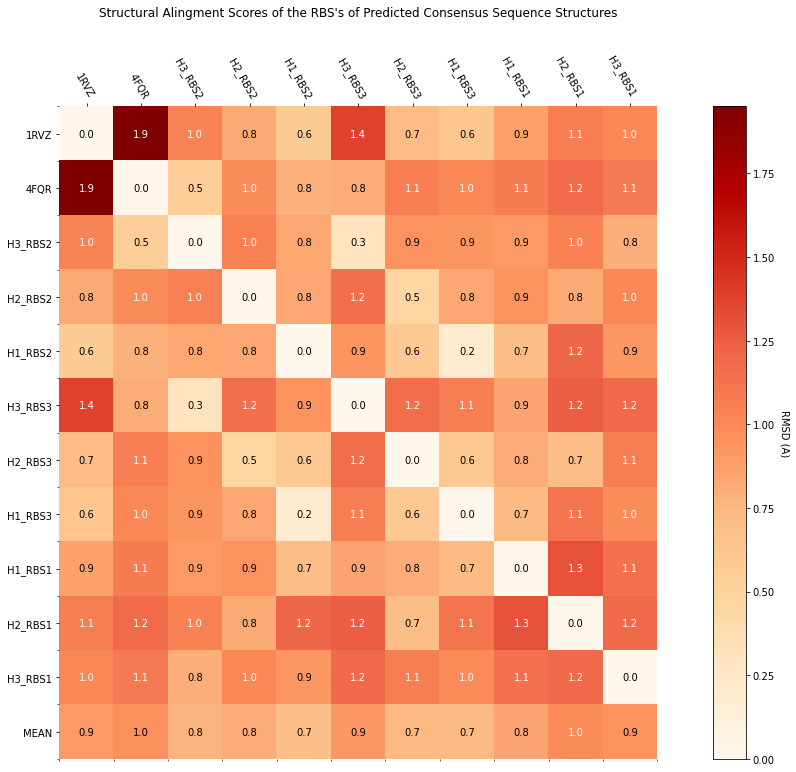

In [15]:
plt.rcParams["figure.figsize"] = (20,12)
fig, ax = plt.subplots()

im, cbar = heatmap(matrix, v_labels, h_labels, ax=ax,
                   cmap="OrRd", cbarlabel="RMSD (A)")
texts = annotate_heatmap(im, valfmt="{x:.1f}")

plt.title("Structural Alingment Scores of the RBS's of Predicted Consensus Sequence Structures\n\n")
plt.savefig(f"{out_name}_heatmap.png", bbox_inches = "tight")
plt.show()